In [1]:
import sklearn.datasets  # IRIS, WINE 
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
iris_dataset = sklearn.datasets.load_iris(as_frame=True)
X_iris = iris_dataset.data
Y_iris = iris_dataset.target
print(iris_dataset.keys())
print(f"IRIS: Data - {X_iris.shape}, Targets - {Y_iris.shape}")

wine_dataset = sklearn.datasets.load_wine(as_frame=True)
print(wine_dataset.keys())
X_wine = wine_dataset.data
Y_wine = wine_dataset.target
print(f"WINE: Data - {X_wine.shape}, Targets - {Y_wine.shape}")

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
IRIS: Data - (150, 4), Targets - (150,)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
WINE: Data - (178, 13), Targets - (178,)


In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
print(glass_identification.keys())  #  Check keys of dict
dataset_glass = glass_identification.data
print(dataset_glass.keys())
X_glass = dataset_glass.features
Y_glass = dataset_glass.targets
features_name_glass = dataset_glass.headers


dict_keys(['data', 'metadata', 'variables'])
dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [23]:
print("IRIS Dataset:")
print("Number of Classes:", len(Y_iris.unique()), "names :", iris_dataset.target_names)
print("Instances:", len(X_iris))
print("Number of Attributes:", len(iris_dataset.feature_names)," name of atribiutes:", iris_dataset.feature_names)
print(iris_dataset.DESCR)

IRIS Dataset:
Number of Classes: 3 names : ['setosa' 'versicolor' 'virginica']
Instances: 150
Number of Attributes: 4  name of atribiutes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76  

In [24]:
print("WINE Dataset:")
print("Number of Classes:", len(Y_wine.unique()), "names :", wine_dataset.target_names)
print("Instances:", len(Y_wine))
print("Number of Attributes:", len(wine_dataset.feature_names)," name of atribiutes:", wine_dataset.feature_names)
print(wine_dataset.DESCR)

WINE Dataset:
Number of Classes: 3 names : ['class_0' 'class_1' 'class_2']
Instances: 178
Number of Attributes: 13  name of atribiutes: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   M

In [25]:
print("Glass Dataset:")
print("Number of Classes:", len(Y_glass['Type_of_glass'].unique()))
print("Instances:", glass_identification.metadata.num_instances)
print("Number of Attributes:", glass_identification.metadata.num_features," name of atribiutes: ", X_glass.columns.tolist())
print(glass_identification.metadata.additional_info.variable_info.split('\r\n11.')[1])

Glass Dataset:
Number of Classes: 6
Instances: 214
Number of Attributes: 9  name of atribiutes:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
 Type of glass: (class attribute)
     -- 1 building_windows_float_processed
     -- 2 building_windows_non_float_processed
     -- 3 vehicle_windows_float_processed
     -- 4 vehicle_windows_non_float_processed (none in this database)
     -- 5 containers
     -- 6 tableware
     -- 7 headlamps


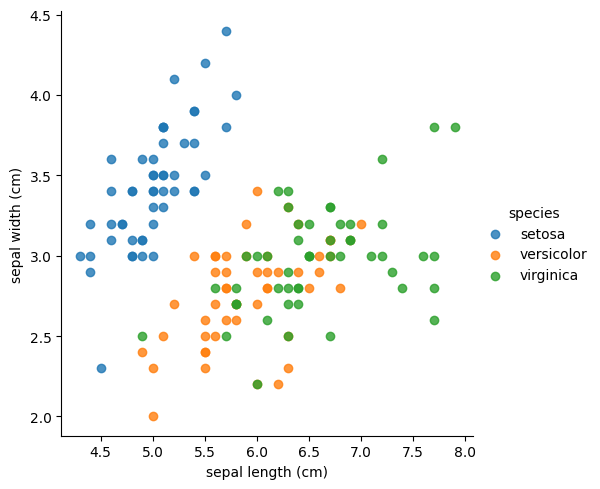

In [26]:
iris_dataset.frame['species'] = iris_dataset.frame['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
sns.lmplot(iris_dataset.frame, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', fit_reg=False)

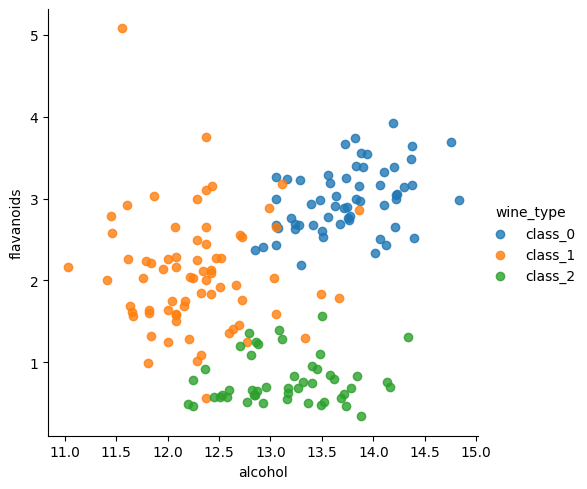

In [33]:
wine_dataset.frame['wine_type'] = wine_dataset.frame['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
sns.lmplot(wine_dataset.frame, x = 'alcohol', y = 'flavanoids', hue='wine_type', fit_reg=False)

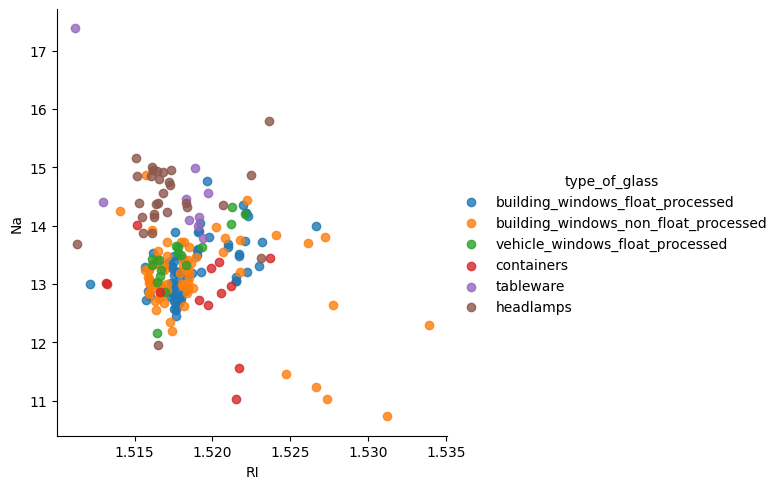

In [28]:
merged_glass_dataframe = pd.concat([X_glass, Y_glass], axis=1)
glass_type_mapping = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

# Map target labels to glass types
mapped_labels = [glass_type_mapping[label] for label in Y_glass['Type_of_glass']]
merged_glass_dataframe["type_of_glass"] = mapped_labels
sns.lmplot(merged_glass_dataframe, x = 'RI', y = 'Na', hue='type_of_glass', fit_reg=False)

In [30]:
iris_target_series = iris_dataset.frame['species']
iris_dataset.frame = iris_dataset.frame.drop(['target'],  axis=1,)

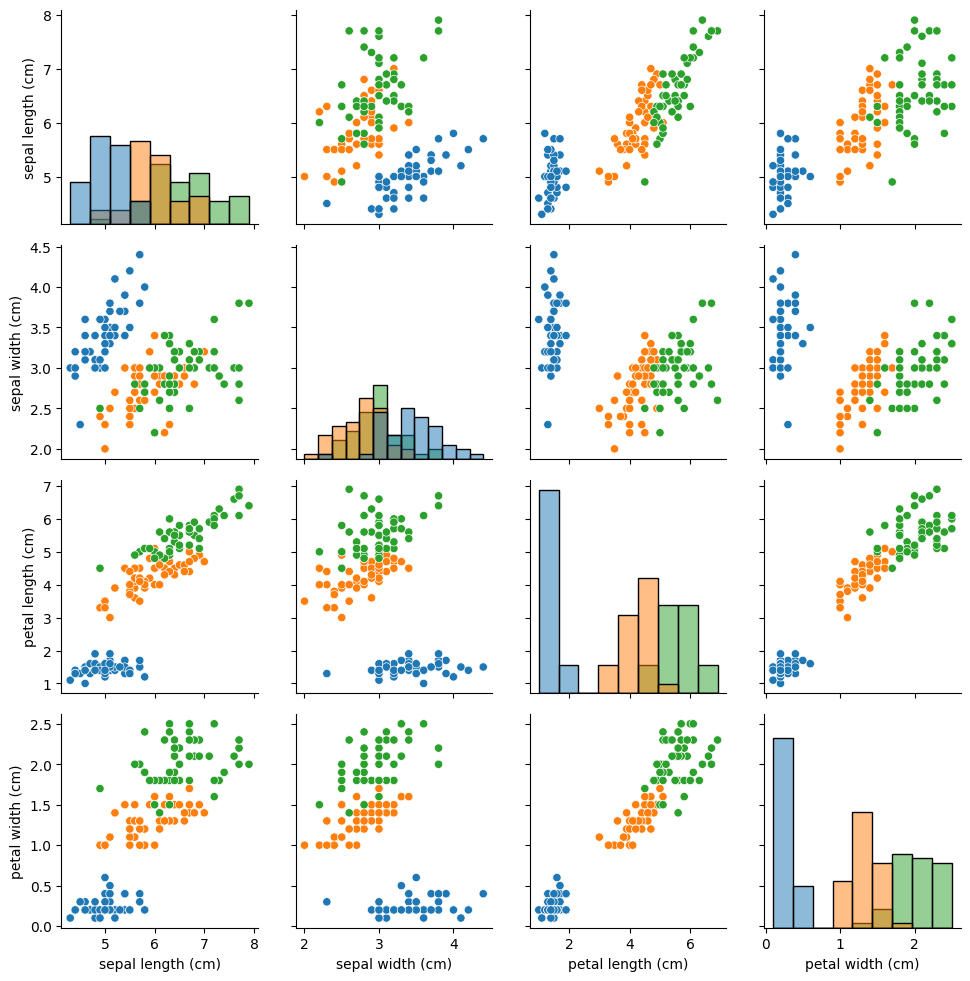

In [31]:
g_iris = sns.PairGrid(iris_dataset.frame, hue="species")
g_iris.map_upper(sns.scatterplot)
g_iris.map_diag(sns.histplot)
g_iris.map_lower(sns.scatterplot)

In [35]:
wine_target_series = wine_dataset.frame['wine_type']
wine_dataset.frame = wine_dataset.frame.drop('target',  axis=1,)

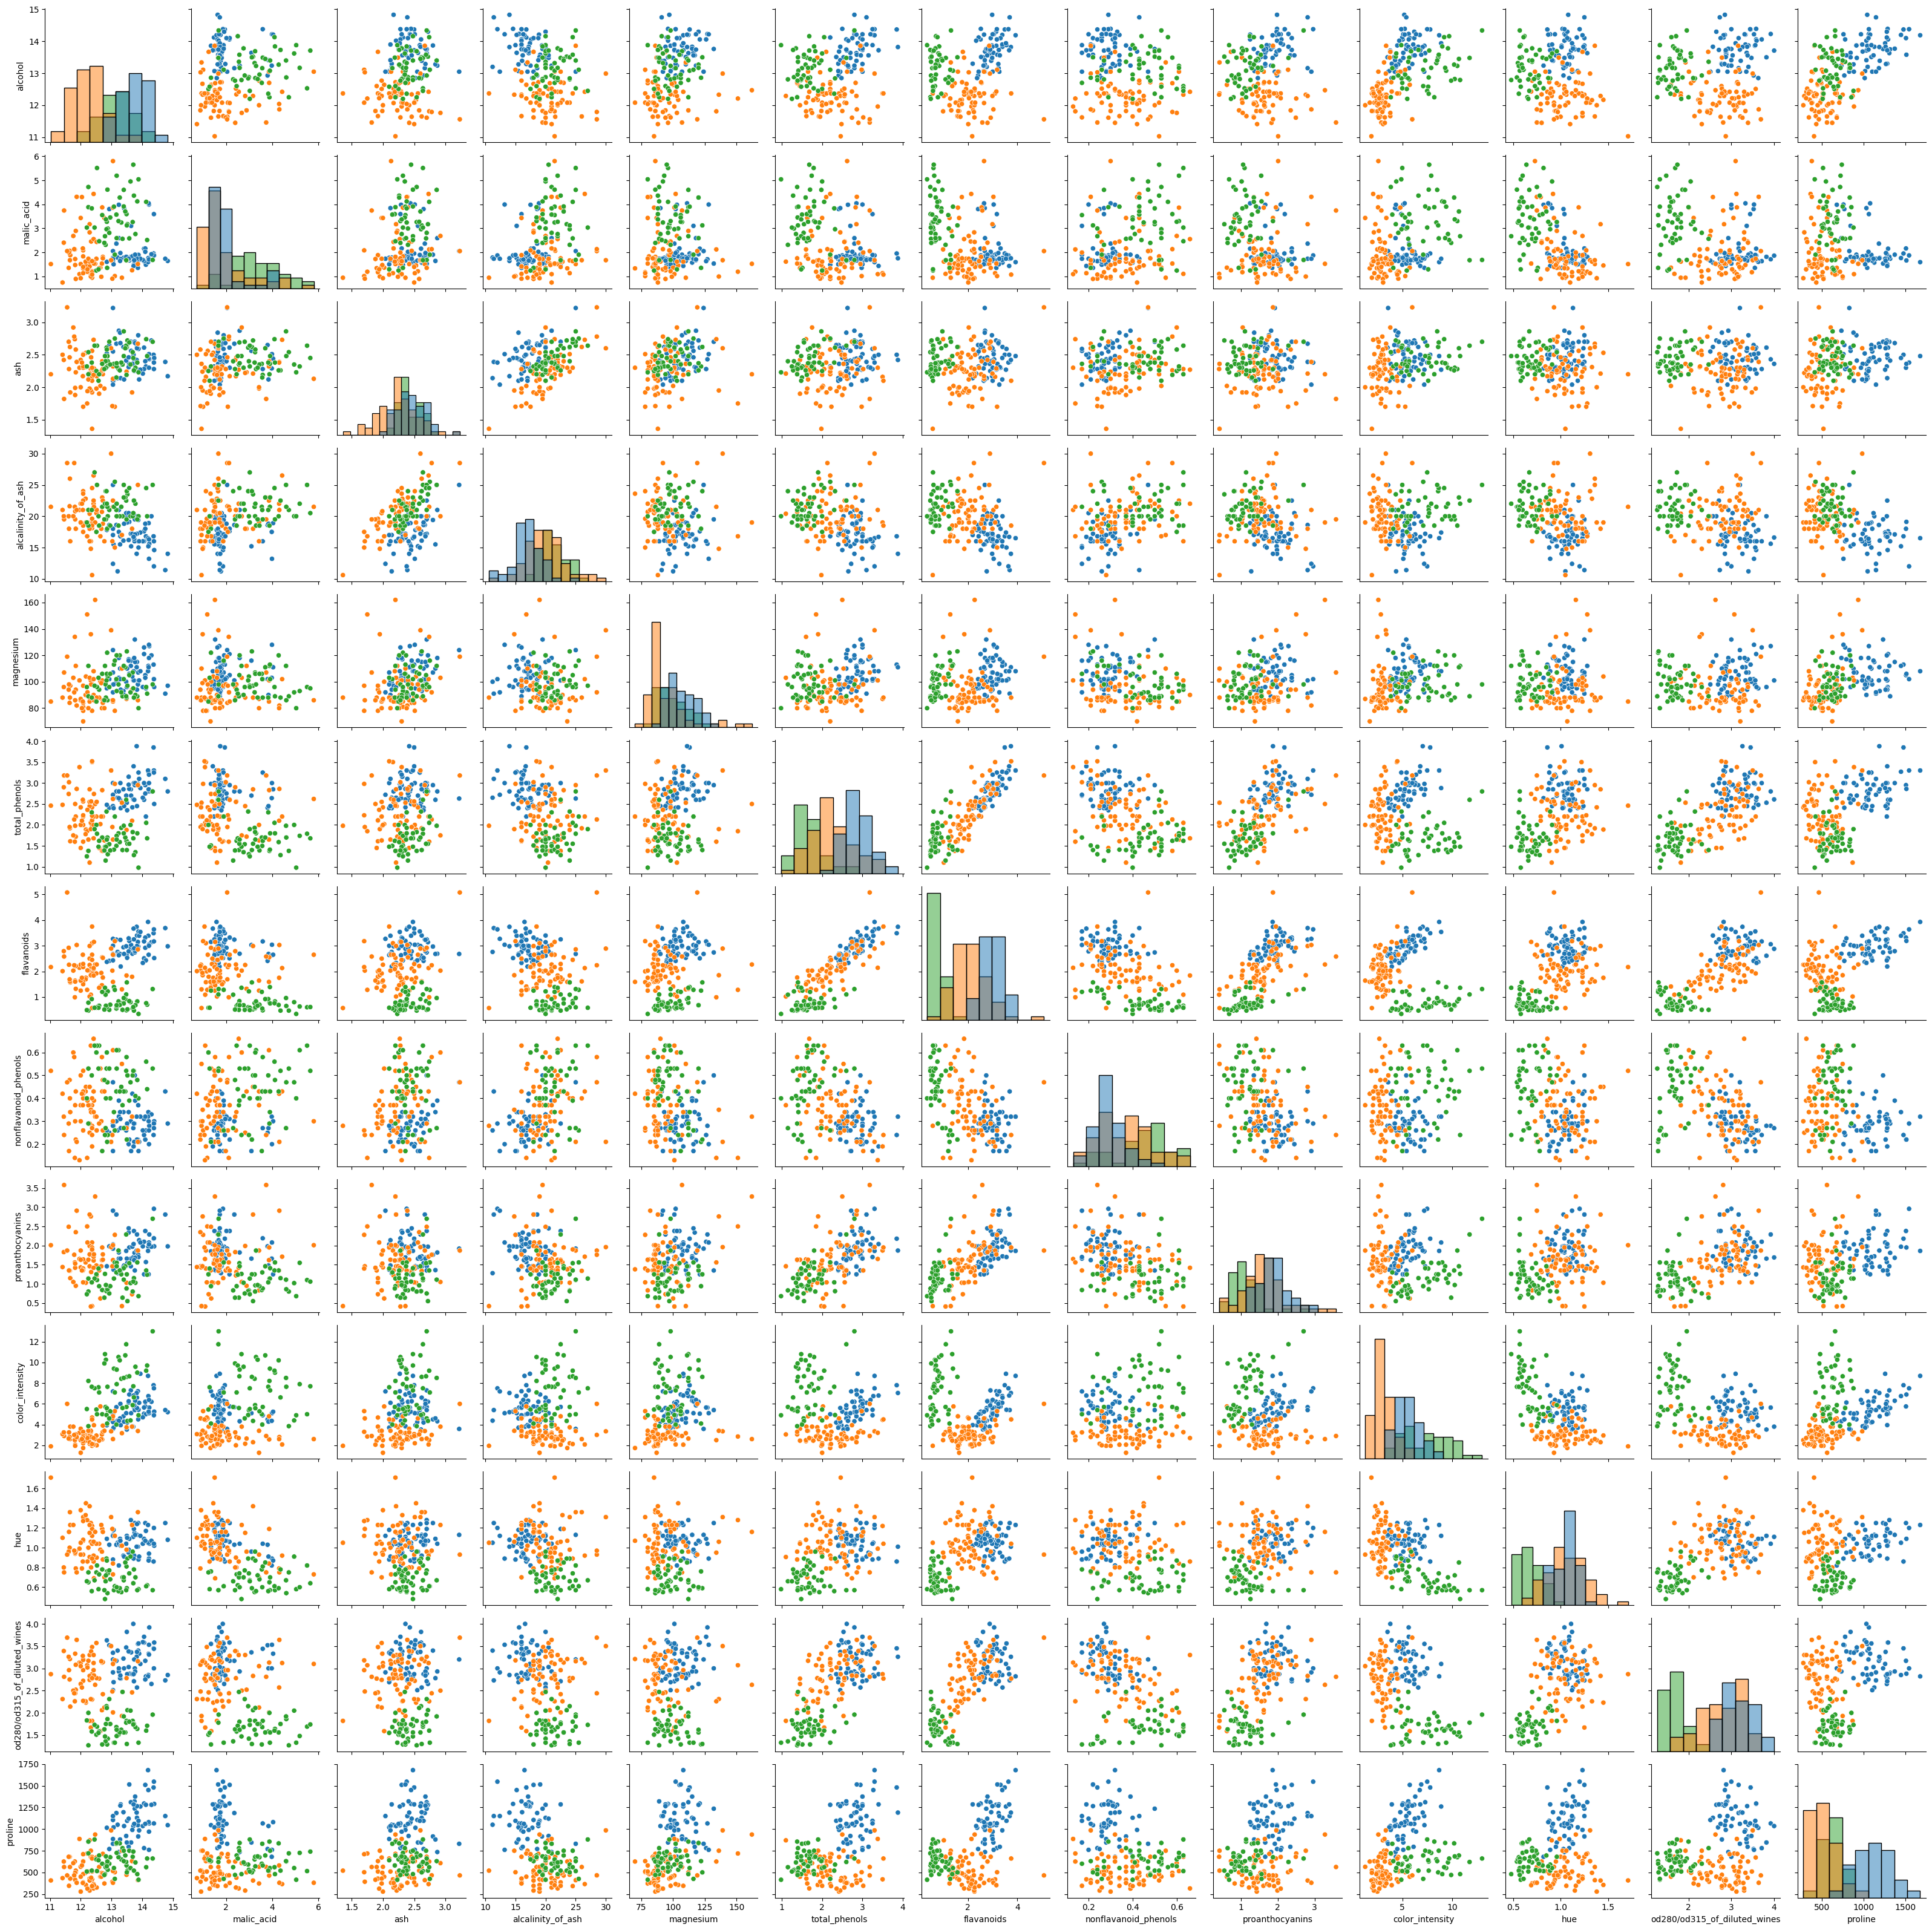

In [36]:
g_wine = sns.PairGrid(wine_dataset.frame, hue="wine_type")
g_wine.map_upper(sns.scatterplot)
g_wine.map_diag(sns.histplot)
g_wine.map_lower(sns.scatterplot)

In [37]:
type_of_glass_series = merged_glass_dataframe['Type_of_glass']
merged_glass_dataframe = merged_glass_dataframe.drop('Type_of_glass',  axis=1,)

In [33]:
display(merged_glass_dataframe)

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  \
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   

                        type_of_glass  
0    building_windows_float_processed  
1    building_windows_float_processed  
2    building_windows_float_processed  
3    building_windows_float_processed  
4    building_windows_float_processed  
..                                ...  
209                         headlamps  
210                         headlamps  
211                         headlamps  
212                         headlamps  
213                         headlamps  

[214 rows x 10 columns]

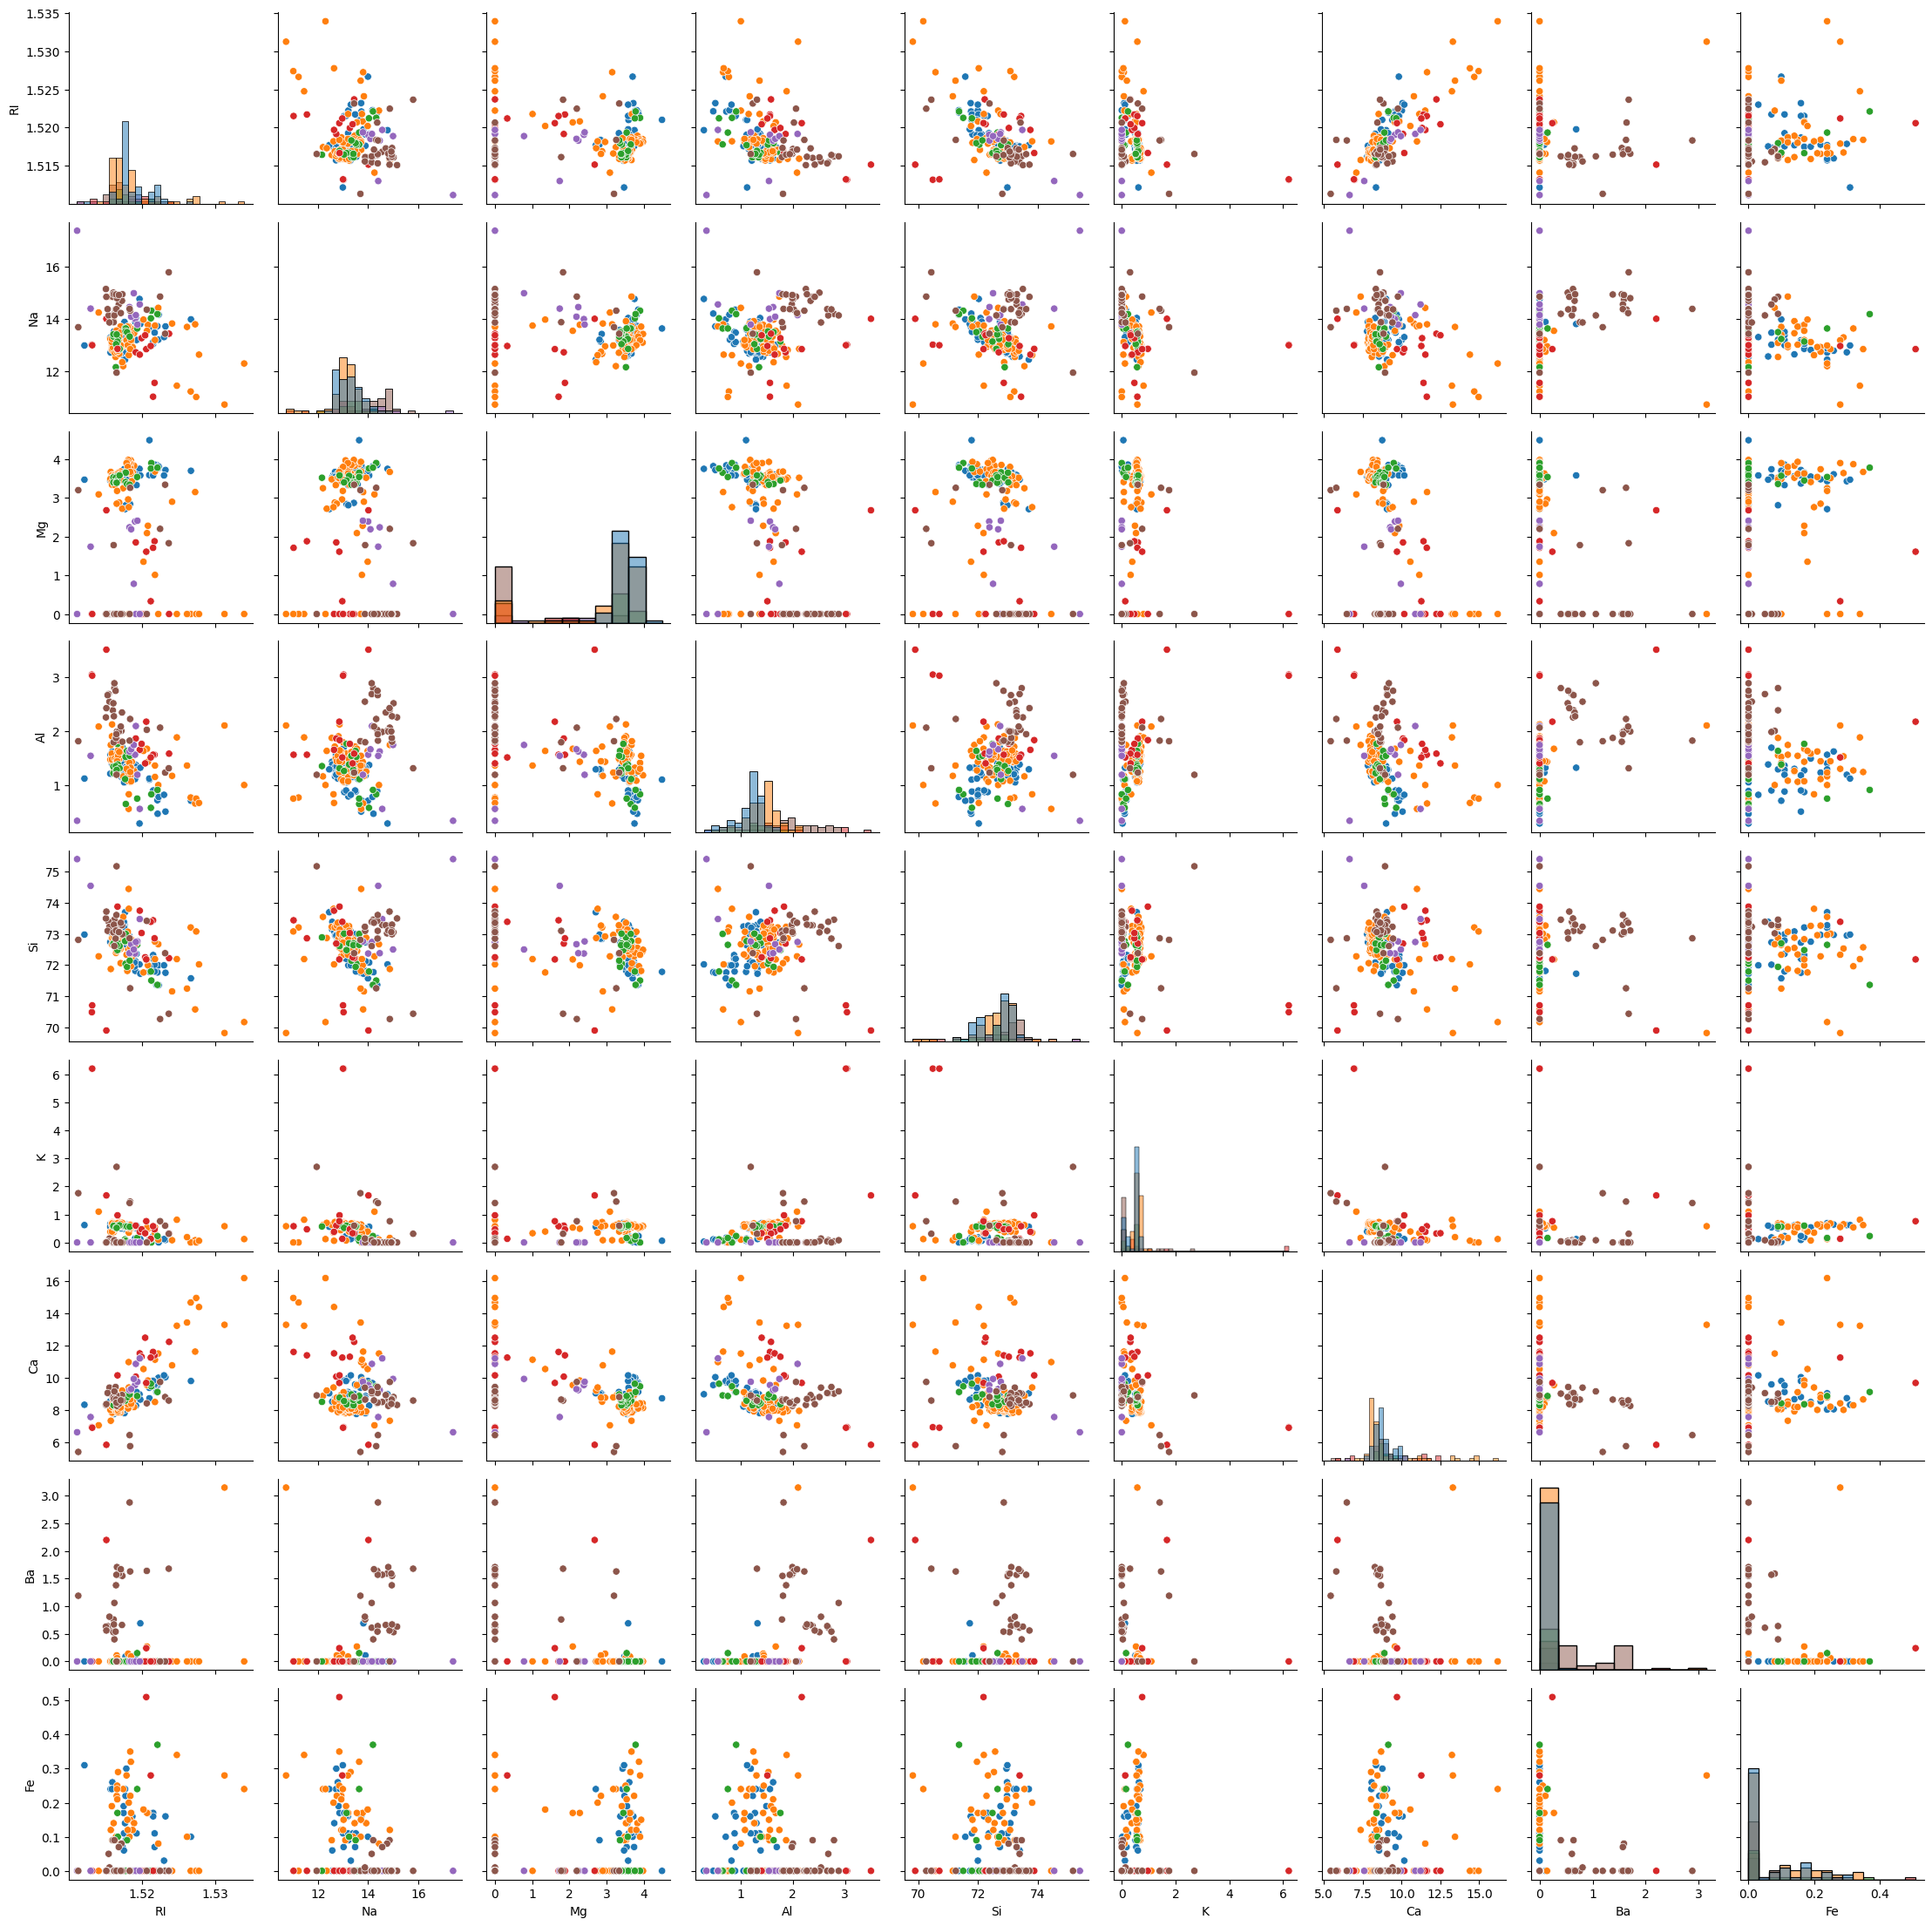

In [34]:
g_glass = sns.PairGrid(merged_glass_dataframe, hue="type_of_glass")
g_glass.map_upper(sns.scatterplot)
g_glass.map_diag(sns.histplot)
g_glass.map_lower(sns.scatterplot)

It is imperative to mention that a feature set must be normalized before applying PCA. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

In [46]:
display(X_iris)
sc = StandardScaler()
scaled_X_iris = sc.fit_transform(X_iris)
print(scaled_X_iris.shape)
pca_iris = PCA()
pca_iris_array = pca_iris.fit_transform(scaled_X_iris)
print(pca_iris_array.shape)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

(150, 4)
(150, 4)


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

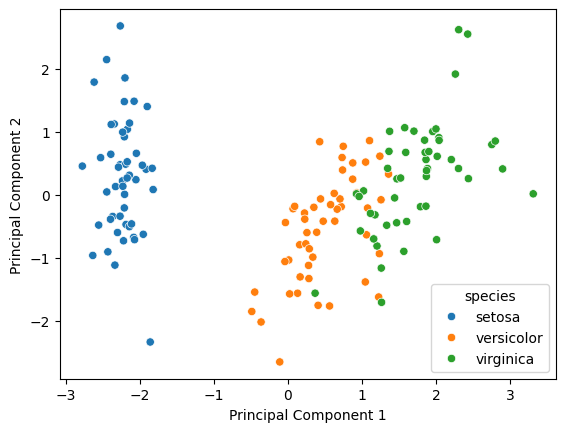

In [39]:
df = pd.DataFrame(data=pca_iris_array[:,:2], columns=['Principal Component 1', 'Principal Component 2'])
sns.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue=iris_target_series)

In [48]:
variance_explained_pc = pca_iris.explained_variance_ratio_
print(f"Variance explained by PC: {variance_explained_pc}")


Variance explained by PC1: [0.72962445 0.22850762 0.03668922 0.00517871]


In [53]:
display(X_glass)
sc = StandardScaler()
scaled_X_glass = sc.fit_transform(X_glass)
print(scaled_X_glass.shape)
pca_glass = PCA()
pca_glass_array = pca_glass.fit_transform(scaled_X_glass)
print(pca_glass_array.shape)

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

(214, 9)
(214, 9)


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

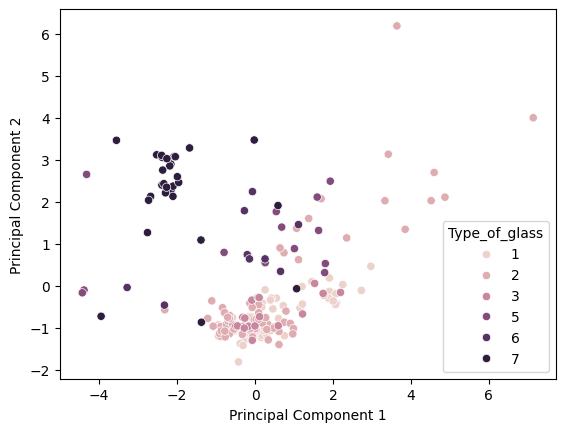

In [54]:
df = pd.DataFrame(data=pca_glass_array[:,:2], columns=['Principal Component 1', 'Principal Component 2'])
sns.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue=type_of_glass_series)

In [56]:
variance_explained_pc = pca_glass.explained_variance_ratio_
print(f"Variance explained by PC: {variance_explained_pc}")

Variance explained by PC: [2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]


In [57]:
display(X_wine)
sc = StandardScaler()
scaled_X_wine = sc.fit_transform(X_wine)
print(scaled_X_wine.shape)
pca_wine = PCA()
pca_wine_array = pca_wine.fit_transform(scaled_X_wine)
print(pca_wine_array.shape)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

(178, 13)
(178, 13)


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

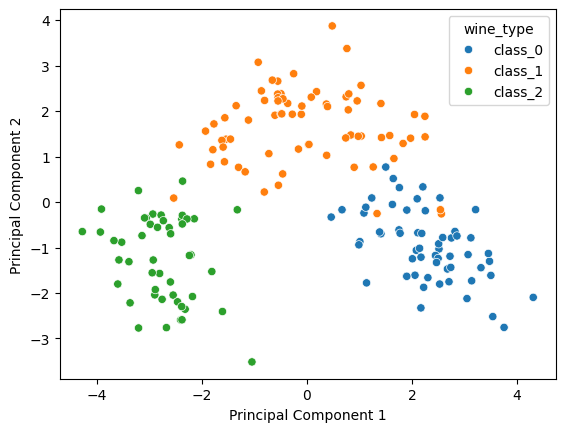

In [58]:
df = pd.DataFrame(data=pca_wine_array[:,:2], columns=['Principal Component 1', 'Principal Component 2'])
sns.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue=wine_target_series)

In [59]:
variance_explained_pc = pca_wine.explained_variance_ratio_
print(f"Variance explained by PC: {variance_explained_pc}")

Variance explained by PC: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
